# What are Tensors?

## Tensors

- GPU accelerators를 사용할 수 있는 점을 제외하고 numpy의 ndarrays와 유사함
- 사실, tensors와 Numpy arrays는 종종 같은 메모리를 공유하기도 함
- 자동 미분을 최적화하는 기능이 있음

In [1]:
import torch
import numpy as np

## Initializing a Tensor

### Directly from data
- 데이터 형은 자동으로 추론됨

In [2]:
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

### NumPy array

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

### From another tensor
- 기존 tensor의 properties(shape, data type) 정보를 활용할 수 있음

In [4]:
x_ones = torch.ones_like(x_data)
print(x_ones)

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(x_rand)

tensor([[1, 1],
        [1, 1]])
tensor([[0.5675, 0.4661],
        [0.9169, 0.5502]])


### with random or constant values

In [5]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(rand_tensor)
print(ones_tensor)
print(zeros_tensor)

tensor([[0.7313, 0.6241, 0.2426],
        [0.2097, 0.6772, 0.0513]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of a Tensor
- Tensor의 attribute은 shape, data type, and 저장된 장치를 표현함

In [6]:
tensor = torch.rand(3, 4)

print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

torch.Size([3, 4])
torch.float32
cpu


## Operations on Tensors
- 100개 이상의 Tensor operation은 https://pytorch.org/docs/stable/torch.html 에서 확인 가능
- 각 operation은 GPU를 활용할 수 있으며 일반적으로 GPU의 연산이 더욱 빠름
- Tensor는 기본적으로 CPU을 사용하도록 생성되므로 `.to` 함수를 사용하여 명시적으로 GPU로 옮겨야 함

In [7]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")

### Standard numpy-like indexing and slicing

In [8]:
tensor = torch.rand(4, 4)
print("First row: ", tensor[:, 0])
print("First column: ", tensor[0, :])
print("Last column: ", tensor[-1, :])

tensor[:, 1] = 0
print(tensor)

First row:  tensor([0.5370, 0.1508, 0.1293, 0.3405])
First column:  tensor([0.5370, 0.6152, 0.0887, 0.8909])
Last column:  tensor([0.3405, 0.5877, 0.3791, 0.8248])
tensor([[0.5370, 0.0000, 0.0887, 0.8909],
        [0.1508, 0.0000, 0.4380, 0.9449],
        [0.1293, 0.0000, 0.3429, 0.0960],
        [0.3405, 0.0000, 0.3791, 0.8248]])


### Joining tensors
- torch.cat: 차원이 증가하지 않음
- torch.stack: 차원이 증가하면서 결합됨. `unsqueeze(0)` + `cat` 효과

In [9]:
t1 = torch.cat([tensor, tensor, tensor], dim=0) # row-wide
print(t1)

tensor([[0.5370, 0.0000, 0.0887, 0.8909],
        [0.1508, 0.0000, 0.4380, 0.9449],
        [0.1293, 0.0000, 0.3429, 0.0960],
        [0.3405, 0.0000, 0.3791, 0.8248],
        [0.5370, 0.0000, 0.0887, 0.8909],
        [0.1508, 0.0000, 0.4380, 0.9449],
        [0.1293, 0.0000, 0.3429, 0.0960],
        [0.3405, 0.0000, 0.3791, 0.8248],
        [0.5370, 0.0000, 0.0887, 0.8909],
        [0.1508, 0.0000, 0.4380, 0.9449],
        [0.1293, 0.0000, 0.3429, 0.0960],
        [0.3405, 0.0000, 0.3791, 0.8248]])


In [10]:
t2 = torch.cat([tensor, tensor, tensor], dim=1) # column-wide
print(t2)

tensor([[0.5370, 0.0000, 0.0887, 0.8909, 0.5370, 0.0000, 0.0887, 0.8909, 0.5370,
         0.0000, 0.0887, 0.8909],
        [0.1508, 0.0000, 0.4380, 0.9449, 0.1508, 0.0000, 0.4380, 0.9449, 0.1508,
         0.0000, 0.4380, 0.9449],
        [0.1293, 0.0000, 0.3429, 0.0960, 0.1293, 0.0000, 0.3429, 0.0960, 0.1293,
         0.0000, 0.3429, 0.0960],
        [0.3405, 0.0000, 0.3791, 0.8248, 0.3405, 0.0000, 0.3791, 0.8248, 0.3405,
         0.0000, 0.3791, 0.8248]])


In [11]:
t3 = torch.stack([tensor, tensor, tensor], dim=0) # dim=0
print(t3)

tensor([[[0.5370, 0.0000, 0.0887, 0.8909],
         [0.1508, 0.0000, 0.4380, 0.9449],
         [0.1293, 0.0000, 0.3429, 0.0960],
         [0.3405, 0.0000, 0.3791, 0.8248]],

        [[0.5370, 0.0000, 0.0887, 0.8909],
         [0.1508, 0.0000, 0.4380, 0.9449],
         [0.1293, 0.0000, 0.3429, 0.0960],
         [0.3405, 0.0000, 0.3791, 0.8248]],

        [[0.5370, 0.0000, 0.0887, 0.8909],
         [0.1508, 0.0000, 0.4380, 0.9449],
         [0.1293, 0.0000, 0.3429, 0.0960],
         [0.3405, 0.0000, 0.3791, 0.8248]]])


In [12]:
t4 = torch.cat([tensor.unsqueeze(0), tensor.unsqueeze(0), tensor.unsqueeze(0)], dim=0)
print(t3 == t4)

tensor([[[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]],

        [[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]],

        [[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]])


In [13]:
t5 = torch.stack([tensor, tensor, tensor], dim=1) # dim=1
print(t5)

tensor([[[0.5370, 0.0000, 0.0887, 0.8909],
         [0.5370, 0.0000, 0.0887, 0.8909],
         [0.5370, 0.0000, 0.0887, 0.8909]],

        [[0.1508, 0.0000, 0.4380, 0.9449],
         [0.1508, 0.0000, 0.4380, 0.9449],
         [0.1508, 0.0000, 0.4380, 0.9449]],

        [[0.1293, 0.0000, 0.3429, 0.0960],
         [0.1293, 0.0000, 0.3429, 0.0960],
         [0.1293, 0.0000, 0.3429, 0.0960]],

        [[0.3405, 0.0000, 0.3791, 0.8248],
         [0.3405, 0.0000, 0.3791, 0.8248],
         [0.3405, 0.0000, 0.3791, 0.8248]]])


## Arithmetic operations

In [14]:
# 행렬 곱
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[1.0899, 0.9616, 0.1854, 0.9513],
        [0.9616, 1.1074, 0.2604, 0.9968],
        [0.1854, 0.2604, 0.1435, 0.2533],
        [0.9513, 0.9968, 0.2533, 0.9400]])

In [15]:
(y1 == y2) & (y1 == y3)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [16]:
# element-wise product
z1 = tensor * tensor.T
z2 = tensor.mul(tensor.T)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor.T, out=z3)

tensor([[0.2883, 0.0000, 0.0115, 0.3033],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0115, 0.0000, 0.1176, 0.0364],
        [0.3033, 0.0000, 0.0364, 0.6804]])

In [17]:
(z1 == z2) & (z1 == z3)

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

### Single-element tensors
아래 예제와 같이 모든 Tensor의 값이 하나로 합쳐지는 경우, `item()` 함수를 사용하여 Python 숫자형 값으로 젼환 가능

In [18]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

5.162968635559082 <class 'float'>


### In-plale operations
- 피연산자에 결과를 저장하는 함수를 의미하며, `_` suffix로 표현됨
- 예를 들어 `x.copy_()`, `x.t_()`는 x를 변경함

> **Note:** 메모리를 절약할 수는 있지만 즉시 연산 히스토리가 사라지기 때문에 주의해서 사용 필요

## Bridge with NumPy
CPU Tensor와 NumPy array는 메모리를 공유할 수 있음
 
### Tensor to NumPy array

In [19]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [20]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor

In [21]:
n = np.ones(5)
t = torch.from_numpy(n)

In [22]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


# Load data with PyTorch Datasets and DataLoaders

In [23]:
%matplotlib inline

## Datasets and Dataloaders
- 좀 더 읽기 쉽고 모듈화하기 위해 모델 학습코드와 데이터셋 코드가 결합지 않기를 원했음
- Pytorch는 두 가지 데이터 기본 기능을 제공
    - `torch.utils.data.DataLoader`
    - `torch.utils.data.Dataset`
- `Dataset`은 데이터와 레이블을 저장하고 `DataLoader`는 iterable 객체처럼 쉽게 읽을 수 있도록`Dataset`을 감싸는 형태

### Loading a dataset
- TorchVision을 활용하여 [Fashion-MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) 을 읽는 예제
    - 60,000개의 학습 데이터와 10,000개의 테스트 데이터로 구성됨
    - 28*28 grayscale image, 10 classes

In [24]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data", # data path
    train=True,
    download=True, # root에 데이터가 없는 경우 다운받음
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterating and Visualizing the Dataset

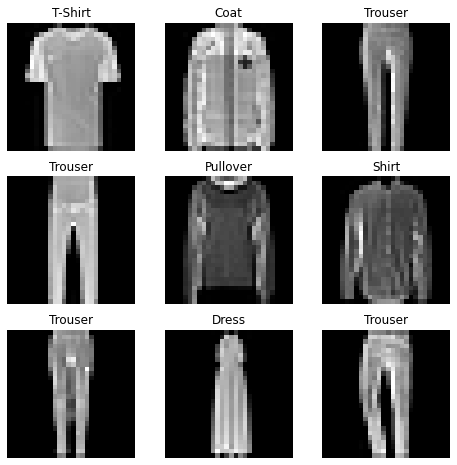

In [25]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Creating a Custom Dataset for your files
- `__init__`, `__len__`, and `__getitem__` 3가지 함수를 꼭 구현해 함
    - `__init__`: images directory, annotation file, transforms 초기화
    - `__dataset__`: sample 수를 반환
    - `__getitem__`: `idx`에 해당하는 이미지와 레이블을 읽어서 반환
- FashionMNIST dataset를 직접 호출하는 예제

In [26]:
import os 
import pandas as pd 
import torchvision.io as tvio

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = tvio.read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.transform
        sample = {"image":image, "label":label}
        return sample    

## Preparing your data for training with DataLoaders

- `Dataset`은 한 번에 하나의 샘플을 반환함
- 모델을 학습하는 동안 minibatch"를 사용함 (모델의 과적합을 방지하기 위해 매 epoch바다 데이터의 순서를 변경함)
- Python의 multiprocessing을 사용하면 속도를 개선할 수 있음
- DataLoader는 손쉬운 API를 통해 이러한 복합성을 추상화한 iterable임

In [27]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


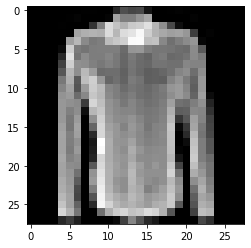

Label: Shirt


In [28]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_map[label.item()]}")

# Transform the data
- 기계학습 알고리즘이 원하는 최종 처리된 형태의 데이터를 항상 얻을 수는 없기 때문에 학습에 알맞은 형태로 변환하는 경우가 많음
- 모든 TrochVision dataset은 두 가지 Parameter(`transform`, `target_transform`)의 설정을 통해 [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)에서 제공하는 변환 함수를 사용할 수 있음 
- FashonMNIST의 경우 PIL Image format으로 저장되어 있어 feature는 정규화된 tensor로, 레이블은 one-hot  encoded tensor의 변환이 필요함
- 이를 위해 `ToTnesor`, `Lambda`를 사용할 예정임

In [29]:
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

### ToTensor()
[ToTensor](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor)는 PIL image, Numpy ndarray를 `FloatTensor` 로 변환하며 [0., 1.] 구간의 값으로 스케일을 변경함
### Lambda transforms
사용자 정의 합수 적용 시에 사용하여 위의 예시에서는 정수값을 one-hot vector로 변환하는 사용자 합수를 대입하였음

# Building the model layers
## Build a neural network
- [torch.nn](https://pytorch.org/docs/stable/nn.html) 네임스페이스는 사용자 고유의 신경망을 구성할 수 있는 모든 블럭을 제공함
- 신경망은 다른 모듈(층)으로 구성된 그 자체이며, 중쳡된 구조는 복잡한 신경망을 쉽게 관리하고 생성할 수 있도록 함

In [30]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Get a hardware device for training
GPU를 활용한 하드웨어 가속이 가능한지 확인하고 불가능하다면 CPU로 진행

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cuda device


### Define the class

- `nn.module`을 사용해서 신경망을 정의하고 `__init__`에서 layer들을 초기화
- 모든 `nn.module` subclass 구현은 `forward` 함수 안에서 입력 데이터에 동작

In [32]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

`NeuralNetwork` 인스턴스를 만들고 장치와 구조를 출력함

In [33]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


- 모델을 사용하기 위해, 입력 데이터를 통과시켜야 하며, 모델의 `forward` 함수을 실행하면 됨
- 모델에 전달하만 백그라운드 연산에 의해 `forward` 함수가 실행되며, 직접 호출해서는 안됨
- 모델의 호출은 각 범주의 예측값을 담은 10 차원 tensor를 반환함. 이를 nn.Softmax에 통화시기면 예측의 확률밀도를 얻을 수 있음

In [34]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)

"""
tensor([[0.0983, 0.1032, 0.1035, 0.0983, 0.0983, 0.0983, 0.0983, 0.1008, 0.1027,
         0.0983]], device='cuda:0', grad_fn=<SoftmaxBackward>)
"""

y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([6], device='cuda:0')


### Model layers

FashionMNIST model의 네트워크를 나누어서 살펴보고, 이미지 3개(28*28)가 포함된 미니배치를 네트워크에 통과시켜서 변화를 확인할 예정

In [35]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


#### nn.Flatten
[nn.Flatten](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html)는 2D 28×28 이미지를 연속된 784픽셀 이미지로 전환(미니배치 차원(at dim=0)은 유지됨)

In [36]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


#### nn.Linear
[linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)는 저장된 가중치와 편향을 사용하여 입력 데이터를 선형 변환함

In [37]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### nn.ReLU
비선형 활성 함수는 모델의 입력과 출력 사이의 복잡한 연결(비선형성)을 생성함. 이 모델에서는 [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)을 사용하였으나 다른 비성형 활성 함수를 사용할 수도 있음

In [38]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.1868,  0.0294, -0.0957, -0.3181,  0.0268,  0.1574, -0.5895, -0.5680,
          0.4480,  0.1576, -0.2269, -0.1276,  0.4701,  0.0279, -0.4837, -0.1998,
         -0.3038,  0.1281, -0.4609, -0.0361],
        [-0.1722,  0.1283,  0.1081, -0.4835,  0.0278,  0.2807, -0.5667, -0.8886,
          0.4338,  0.3818, -0.0741,  0.3561,  0.3050, -0.0107, -0.0197, -0.3315,
         -0.4128,  0.1350, -0.2094, -0.0108],
        [-0.0743, -0.2089, -0.2684,  0.1382,  0.0235,  0.1067, -0.5495, -0.7343,
          0.5339,  0.1988, -0.0891,  0.2588,  0.3409, -0.3066, -0.0862, -0.2195,
         -0.3100,  0.1488, -0.5675, -0.1088]], grad_fn=<AddmmBackward>)


After ReLU: tensor([[0.0000, 0.0294, 0.0000, 0.0000, 0.0268, 0.1574, 0.0000, 0.0000, 0.4480,
         0.1576, 0.0000, 0.0000, 0.4701, 0.0279, 0.0000, 0.0000, 0.0000, 0.1281,
         0.0000, 0.0000],
        [0.0000, 0.1283, 0.1081, 0.0000, 0.0278, 0.2807, 0.0000, 0.0000, 0.4338,
         0.3818, 0.0000, 0.3561, 0.3050, 0.0000, 0.000

#### nn.Sequential

[nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)은 모듈 들의 순서를 정의하고, 데이터는 정의한 순서대로 모든 모듈을 통과함. 

In [39]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)

input_image - torch.rand(3, 28, 28)
logits = seq_modules(input_image)

#### nn.Softmax
신경망의 마지막 층에서는 범위가 [-infty, infty] 인 `logits`을 반환하므로 [nn.Softmax](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)을 사용하여 [0, 1] 사이의 값 즉, 각 범주의 예측 확률변수로 나타낼 수 있음. `dim` parameter는 해당 축의 합이 1인 차원을 가리킴.

In [40]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### Model parameters

신경망의 많은 layer는 파라미터로 나타낼 수 있으며, 파라미터 학습 중 최적화됨. `nn.Module` 를 상속하면 자동으로 모델 내 파라미터들이 추적되며, 모든 파라미터는 모델의 `parameters()` 혹은 `named_parameters()` 함수로 접근할 수 있음

In [41]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : Parameter containing:
tensor([[-0.0161, -0.0268,  0.0353,  ..., -0.0151, -0.0063, -0.0239],
        [-0.0340, -0.0287,  0.0081,  ..., -0.0284, -0.0040, -0.0190],
        [-0.0247,  0.0351,  0.0263,  ..., -0.0092, -0.0182, -0.0018],
        ...,
        [-0.0269,  0.0083,  0.0353,  ..., -0.0325,  0.0254,  0.0244],
        [-0.0162, -0.0263, -0.0021,  ..., -0.0343,  0.0221,  0.0070],
        [-0.0064, -0.0164,  0.0136,  ...,  0.0260, -0.0352, -0.0176]],
       device='cuda:0', requires_grad=True) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values